In [33]:
import os
import nltk
import spacy
import re
import contractions

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nlp = spacy.load('en_core_web_trf', disable=['parser', 'ner'])
stop_words = stopwords.words('english')

character_name = "creed"
season_number = "5"

In [34]:
def clean_text(text):
    text = re.sub(r"[-]", '', text) # match punctuation marks listed and replace them with a single whitespace
    text = re.sub(r"\/", " ", text) # match all literal Line Feed (New line) pattern then replace them by a single whitespace
    text = re.sub(r"\n", " ", text) # match all literal Line Feed (New line) pattern then replace them by a single whitespace
    text = re.sub(r"\xa0", " ", text) # match all literal non-breakable space pattern then replace them by a single whitespace
    text = re.sub('\s+', ' ', text) # match all one or more whitespace then replace them by a single whitespace
    text = re.sub(r"[;,.?!:`'\"]", '', text) # match punctuation marks listed and replace them with a single whitespace
    text = text.strip(' ')
    return text

def expand_contractions(text):
    """expand shortened words, e.g. 'don't' to 'do not'"""
    text = contractions.fix(text)
    return text

def remove_stop_words(text):
    stripped_phrase = []
    for word in text:
      if word not in stop_words:
        stripped_phrase.append(word)
    text = " ".join(stripped_phrase)
    return text

In [35]:
# with open("../data/dialogue for nlp/"+ str(character_name) +"_season_"+ str(season_number) +".txt", encoding='utf-8') as file:
with open("./data/dialogue for nlp/"+ str(character_name) +".txt", encoding='utf-8') as file:

    rawtext = file.read()
    rawtext = rawtext.lower()
    rawtext = expand_contractions(rawtext)
    rawtext = clean_text(rawtext)
    
words1 = word_tokenize(rawtext)
words = remove_stop_words(words1)
words_nlp = nlp(words)
words_lemma = " ".join([token.lemma_ for token in words_nlp])
words_lemma

'huh tell want stay right want stay um think misunderstanding michael go let we fight let we call jan fight thing together like old day start paperwork yet michael undo power undo michael undo fine fire someone else fire devon terrible much well job devon forget fast savior guy give life back thank know would see way michael god bless fine man listen regret either devon terrible one go miss good good good uh michael infer imply infer know long ago yep exactly happen oh teenager iron lung oh ho one pam oh think volunteer basis oh think volunteer thing hi guy somebody makin soup hit hit michael think really think sure hired think might michael much big fear ryan jimmy listen want go amsterdam trust would send hong kong like say hi friend china correct hi kid ever see foot four toe ththe hair cover mostly northern lights cannabis indica great picture white man door know exactly talk sprout mung bean damp paper towel desk drawer nutritious smell like death great soup kitchen downtown scran

In [36]:
fdist = FreqDist(word_tokenize(words_lemma))
fdist.most_common(40)

[('get', 37),
 ('like', 28),
 ('go', 26),
 ('good', 23),
 ('hey', 23),
 ('want', 21),
 ('think', 21),
 ('know', 21),
 ('oh', 18),
 ('man', 17),
 ('one', 17),
 ('look', 15),
 ('right', 14),
 ('guy', 14),
 ('really', 14),
 ('creed', 14),
 ('let', 13),
 ('say', 13),
 ('boss', 13),
 ('we', 12),
 ('thing', 12),
 ('would', 12),
 ('see', 12),
 ('make', 12),
 ('pam', 11),
 ('michael', 10),
 ('well', 10),
 ('love', 10),
 ('okay', 10),
 ('tell', 9),
 ('uh', 9),
 ('two', 9),
 ('yeah', 9),
 ('work', 9),
 ('give', 8),
 ('time', 8),
 ('bratton', 8),
 ('god', 7),
 ('long', 7),
 ('big', 7)]

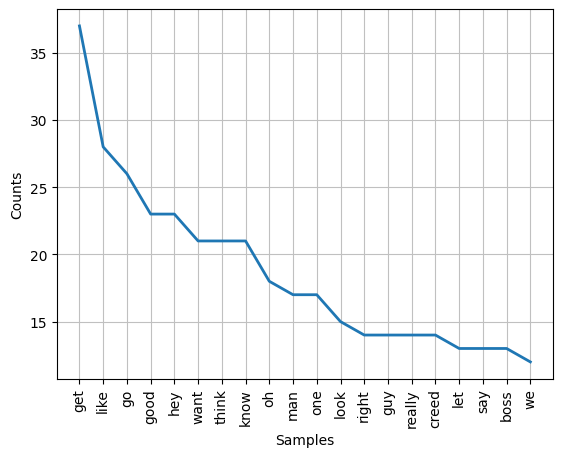

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
fdist.plot(20)

In [38]:
num_vocab = len(set([word for word in words1]))
print(set([word for word in words1]))

{'been', 'scotland', 'jim', 'be', 'much', 'angelas', 'meaning', 'payin', 'olmos', 'undo', 'windshield', 'parents', 'toast', 'site', 'too', 'stuck', 'ceramics', 'security', 'ditch', 'machine', 'trick', 'b', 'away', 'watch', 'taliban', 'involved', 'nope', 'guess', 'fears', 'googoogoogoo', '75', 'sixties', 'so', 'delicious', 'codeine', 'never', 'shame', 'chumps', 'familiar', 'boss', 'food', 'grabs', 'dunder', 'coke', 'indica', 'implying', 'power', 'reelin', 'trashing', 'shelter', 'walk', 'playing', 'seat', 'riches', 'your', 'night', 'dogs', 'mopping', 'puck', 'but', 'business', 'overheard', 'miss', 'makin', 'ob', 'uncow', 'draw', 'already', 'showtime', 'took', 'card', 'by', 'dimes', 'bald', 'thirty', 'tall', 'um', 'misunderstanding', 'age', 'gunjo', 'fear', 'the', 'damp', 'decapitated', 'messy', 'hi', 'friend', 'sprout', 'throw', 'she', 'andy', 'oxycontin', 'todd', 'quar', 'slurpee', 'figured', 'scranton', 'kneecaps', 'weeks', 'tonight', 'into', 'on', 'excuse', 'will', 'peas', 'regret', '

In [39]:
print(num_vocab)

1122
